<a href="https://colab.research.google.com/github/gantaphani/Phanesh_INFO5502_Spring2022/blob/main/lab_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (02/24/2022, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (15 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1) Start by choosing a question you'd like a visualization to answer.

(2) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [1]:
#I'd like to know population count for two years 1900 and 2000, broken down by age groups and gender.

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as gp

url='https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_census.csv'
censusData=pd.read_csv(url,sep=',')
censusData.to_csv('result.csv',sep=',')
censusData['Sex']=np.select([censusData['Sex']==1,censusData['Sex']==2],['Male','Female'],'Unknown')
censusData['Age']=np.select(
    [censusData['Age']==0,censusData['Age']==5,censusData['Age']==10,censusData['Age']==15,censusData['Age']==20,censusData['Age']==25,censusData['Age']==30,
    censusData['Age']==35,censusData['Age']==40,censusData['Age']==45,censusData['Age']==50,censusData['Age']==55,censusData['Age']==60,censusData['Age']==65,
    censusData['Age']==70,censusData['Age']==75,censusData['Age']==80,censusData['Age']==85,censusData['Age']==90],
    ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over','85 and over'])


censusData['Population']=censusData.groupby(['Sex','Age'])['People'].transform('sum')
censusData.drop(['Year','People'],axis=1,inplace=True)
censusData.rename(columns={'Age':'AgeGroup'},inplace=True)
censusData.drop_duplicates(inplace=True)
censusData.reset_index(inplace=True,drop=True)
censusData

,Sex,AgeGroup,Population
0,Male,0-4,14354924
1,Male,5-9,15017929
2,Male,10-14,14620902
3,Male,15-19,14012265
4,Male,20-24,13425353
5,Male,25-29,13048773
6,Male,30-34,13124843
7,Male,35-39,14109065
8,Male,40-44,13581322
9,Male,45-49,11793419


In [3]:
y=censusData['AgeGroup']
x1=censusData[censusData['Sex']=='Male']['Population']
x2=censusData[censusData['Sex']=='Female']['Population']*-1

fig=gp.Figure()
fig.add_trace(gp.Bar(y=y,x=x1,orientation='h',name='Male'))
fig.add_trace(gp.Bar(y=y,x=x2,orientation='h',name='Female'))
fig.update_layout(title='population count for two years 1900 and 2000, broken down by age groups and gender',title_font_size=20,
                  template='plotly_white',barmode='relative',bargap=0.0,bargroupgap=0.0,
                  xaxis=dict(tickvals=[-15000000,-10000000,-5000000,0,5000000,10000000,15000000],
                             ticktext=['15M','10M','5M','0','5M','10M','15M'],
                             title='Population In Millions',title_font_size=15))
fig.update_yaxes(title_text='Age Group')
fig.show()

In [4]:
#I have to change the dataset in order to accomplish this. For a better understanding, I've encoded the sex values, such as 1 represents Male and 2 denotes Female.
#Then I divided the Age into age groups, such as 0-4, 5-9, and so on. Later, the population was counted by grouping the people by age and gender.
#We've also eliminated the year column because we're totaling the population over two years, so it's no longer necessary.
#Finally, for better presentation, duplicates and missing values were deleted.

#One of the most efficient ways to visualize the structure of the population in a census is to use population pyramids.
#The structure of a population pyramid can instantly notify a viewer about a country's demographic trend in the near future.
#It will be more appealing to visualize population structure and see differences by age/gender using population pyramid charts.

#There are no column values that overlap in this graph. We plotted Population in Millions on the x axis, and Age Group on the y axis.
#The most effective visual variables for information are titles, labels for axes, and legends, thus we included these in our chart to express some of the most significant data.
#The template backdrop is white to highlight the bars, and bar gaps are ignored and reduced to zero. 
#When the mouse pointer is over, a hint is utilized to display the value for better communication.
#Color aids us in highlighting the most significant features of data and simplifying complicated graphs.
#You may simplify data and help users understand the overall picture by utilizing contrasting hues like blue and orange.

Question 2 (20 points). In this question, you are required to use visualizations to tell a story about a dataset.

Step 1. Pick a domain and data set that you are interested in.

Peruse the provided data sets: http://nixdell.com/classes/HCI-and-Design-Spring-2016/Resources.html.

Choose the one of greatest interest to you. If you would like to explore a different data set, you are free to do so but be aware of how much work might be needed to clean the data and get it into a usable format.

Step 2. Explore the data. Find a story. Ask questions.

Start by asking questions. For example: Is there a relationship between melting point and atomic number? Are the brightness and color of stars correlated? Are there different patterns of nucleotides in different regions in human DNA?

Step 3. Assess the fitness of the data for answering your question.

Inspect the data -- it is invariably helpful to first look at the raw values. Does the data seem appropriate for answering your question? If not, you may need to start the process over. If so, does the data need to be reformatted or cleaned prior to analysis? Perform any steps necessary to get the data into shape prior to visual analysis.

Step 4. Create the visualization(s) that tell a story about the data.

You will likely need to create several and see what works best. Keep a record of things you tried and discarded.


In [5]:
#I have collected the haberman dataset from kaggle and started EDA
#Data Source:https://raw.githubusercontent.com/gantaphani/Phanesh_INFO5502_Spring2022/main/haberman.csv

In [7]:
#1 I want to visualize Is there any relationship or correlation between Age and Nodes w.r.t Survival Status.
#2 I want to visualize which Age Group have survived the most and least.
#3 I'd like to view the distribution of nodes by age, as well as where the maximum concentration of nodes by age.
#4 I want to visualize what are the best features to identify Status.

In [8]:
import pandas as pd
url='https://raw.githubusercontent.com/gantaphani/Phanesh_INFO5502_Spring2022/main/haberman.csv'
haberman=pd.read_csv(url,sep=',',encoding = 'unicode_escape',header=None)
haberman.columns=['Age','Year','Nodes','Status']
haberman.head(5)

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
print(haberman.isnull().any())
print("\nNote that there are no missing values in the Dataset")

Age       False
Year      False
Nodes     False
Status    False
dtype: bool

Note that there are no missing values in the Dataset


In [10]:
print("Summary Statastics for a DataFrame")
print(haberman.describe())

Summary Statastics for a DataFrame
              Age        Year       Nodes      Status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [11]:
print('Size of the DataFrame\n')
rows,columns=haberman.shape
print("Number of Rows are:",rows)
print("Number of Columns are:",columns)

Size of the DataFrame

Number of Rows are: 306
Number of Columns are: 4


In [12]:
print('1 means the patient survived 5 years or longer,2 means the patient died within 5 year')
print('\nUNIQUE VALUES IN STATUS COLUMN',haberman['Status'].unique())
haberman['Status']=haberman['Status'].apply(lambda x:'Survived' if x==1 else 'Died')
print('\nDecoded Status Values with 1 as survived,2 as Died')
print('\nAFTER DECODING UNIQUE VALUES IN STATUS COLUMN',haberman['Status'].unique())

1 means the patient survived 5 years or longer,2 means the patient died within 5 year

UNIQUE VALUES IN STATUS COLUMN [1 2]

Decoded Status Values with 1 as survived,2 as Died

AFTER DECODING UNIQUE VALUES IN STATUS COLUMN ['Survived' 'Died']


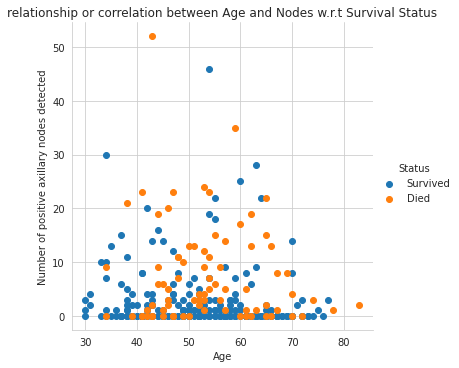

In [13]:
#I want to see Is there any relationship or correlation between Age and Nodes w.r.t Survival Status
#2-D scatter plot with color coding
import seaborn as s
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

s.set_style("whitegrid")
s.FacetGrid(haberman,hue='Status',size=5).map(plt.scatter,'Age','Nodes').add_legend()
plt.ylabel('Number of positive axillary nodes detected')
plt.title("relationship or correlation between Age and Nodes w.r.t Survival Status")
plt.show()

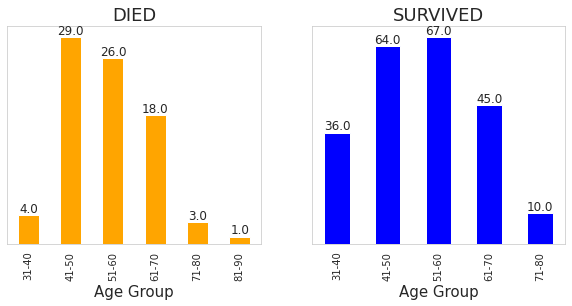

In [14]:
#I want to see which Age Group have survived the most and least
#Bar Plot
from importlib import reload
plt=reload(plt)

def AgeGroup(row):
  if 31 <=row['Age'] <=40:
    return '31-40'
  elif 41 <=row['Age'] <=50:
    return '41-50'
  elif 51 <=row['Age'] <=60:
    return '51-60'
  elif 61 <=row['Age'] <=70:
    return '61-70'
  elif 71 <=row['Age'] <=80:
    return '71-80'
  elif 81 <=row['Age'] <=90:
    return '81-90'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
haberman['AgeGroup']=haberman.apply(AgeGroup,axis=1)

plot1=haberman[haberman['Status']=='Died'].groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='bar',stacked=True,ax=axes[0],color='orange')
plot2=haberman[haberman['Status']=='Survived'].groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='bar',stacked=True,ax=axes[1],color='blue')

for plot in plot1,plot2:
  for patch in plot.patches:
      height = patch.get_height()
      width = patch.get_width()
      new_width = width * 1
      patch.set_width(new_width)
      x = patch.get_x()
      patch.set_x(x + (width - new_width) / 2)
      plot.text(x=x + width/2, y=height, s=height, ha='center', va='bottom',fontsize=12)

plot1.set_title("DIED",fontsize=18)
plot1.set_xlabel('Age Group',fontsize=15)
plot1.grid(False)
plot1.set_yticks([])
plot2.set_title("SURVIVED",fontsize=18)
plot2.set_xlabel('Age Group',fontsize=15)
plot2.grid(False)
plot2.set_yticks([])
plt.show()

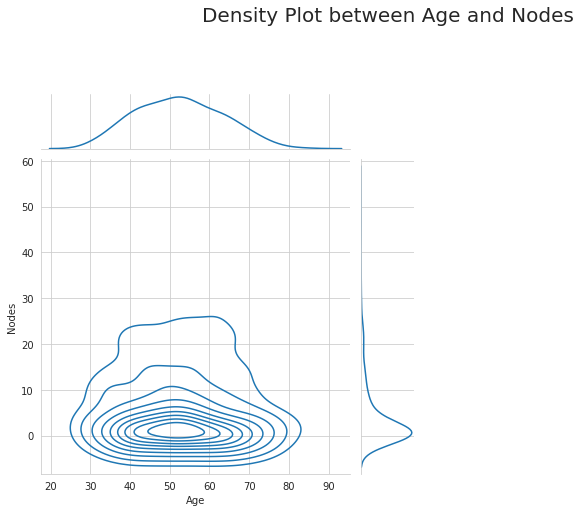

In [15]:
#I'd like to view the distribution of nodes by age, as well as where the maximum concentration of nodes by age.
#2D Density plot, contors-plot
s.jointplot(x="Age", y="Nodes", data=haberman, kind="kde")
plt.title("Density Plot between Age and Nodes\n\n\n\n\n\n",fontsize=20)
plt.show()

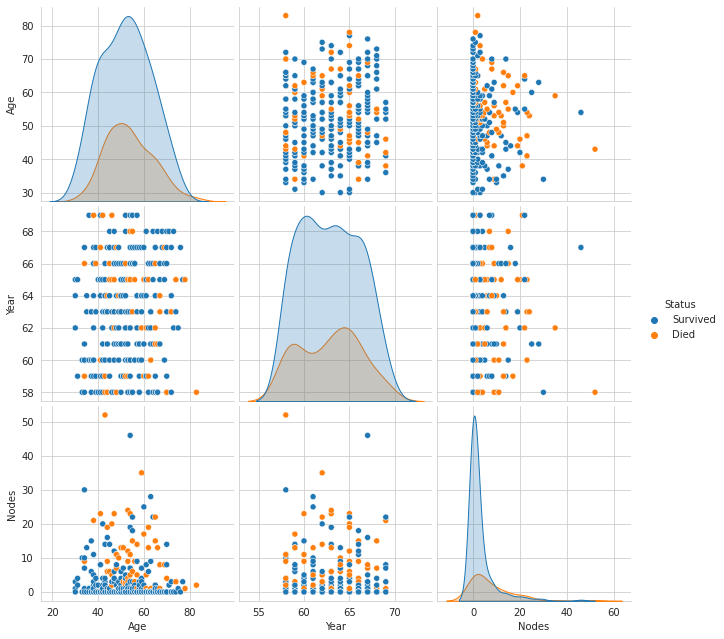

In [16]:
#I want to see what are the best features to identify Status 
#Pair plots 
s.set_style('whitegrid')
s.pairplot(haberman,hue='Status',size=3)
plt.show()

Question 3 (15 points). In this question, you are required to create visualization for time series data. 

We have collected all the articles from AMIA in the last 30 years. The dataset is avaliable on GitHub: https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv. 

Please use the tool Yake: https://github.com/LIAAD/yake to extract the top N (you can set different N value to get the best visualization results) keywords from the article titles (all the articles), then visualize how the keywords changed over years in one figure. (Split the data by every five years)

In [17]:
!pip install yake
import yake as y
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 60 kB 4.2 MB/s 
     |████████████████████████████████| 132 kB 18.0 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73989 sha256=4b9086364522dd603f408a4b199af773bd4e6fc11ceb0bd9c4d7b5a28d08856c
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [18]:
articlesDataset=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv',sep=',')
articlesDataset

,pmc_id,title,authors,authors_information,year,abstract
0,8075400,Association of White Matter Hyperintensity Pro...,Kentaro Hirao,"aDepartment of Geriatric Medicine, Tokyo Medic...",2021.0,white matter hyperintensities wmh mri reported...
1,8075401,Mild Behavioral Impairment and Subjective Cogn...,Fumio Yamashita,"bDepartment of Ultrahigh Field MRI, Institute ...",2021.0,mild behavioral impairment mbi subjective cogn...
2,8075402,Safety Monitoring of Gene Therapy for Spinal M...,Akito Tsugawa,"aDepartment of Psychiatry, University of Calga...",2021.0,recently gene therapy onasemnogene abeparvovec...
3,8075403,Assessing the Progression of Alzheimer’s Disea...,Rieko Haime,"bDepartment of Clinical Neurosciences, Univers...",2021.0,exists considerable variation disease progress...
4,8075404,Investigating the Spatial Associations Between...,Raita Fukasawa,"cDepartment of Community Health Sciences, Univ...",2021.0,proposed amyloidβ aβ play causal role alzheime...
...,...,...,...,...,...,...
5077,2581286,A Comparison of Models for Predicting the Outc...,Harriet H. Werley,Harriet H. Werley,1981.0,several basic strategy may employed design new...
5078,2581287,Impact of Computers on Nursing Research,Donna L. HudsonandThelma Estrin,Donna L. HudsonandThelma Estrin,1981.0,microcomputerbased nuclear submarine ready fle...
5079,2581288,Microcomputer-Based Expert System for Clinical...,Virginia K. Saba,Virginia K. Saba,1981.0,substantial portion record historical nature p...
5080,2581289,Impact of Computers on Nursing Administration ...,Jane BarnettandDavid Kramlich,Jane BarnettandDavid Kramlich,1981.0,computeraided interactive game developed joint...


In [19]:
articlesDataset=pd.DataFrame(articlesDataset.groupby('year').agg(lambda x: ','.join(x))['title']).merge(articlesDataset['year'],on='year',how='inner')
articlesDataset['year']=articlesDataset['year'].astype(int)
articlesDataset.dropna(inplace=True)
articlesDataset.drop_duplicates(inplace=True)
articlesDataset.reset_index(drop=True,inplace=True)
articlesDataset.rename(columns={'year':'Year','title':'Titles'},inplace=True)
print("I organized the dataset by grouping the year, which contains all titles separated by a comma, and removing other unnecessary columns.\n")
print(articlesDataset.head(5))

I organized the dataset by grouping the year, which contains all titles separated by a comma, and removing other unnecessary columns.

   Year                                             Titles
0  1981  Computer Use in Office and Ambulatory Practice...
1  1982  Studying Hypotheses on a Time-Oriented Clinica...
2  1983  Workshop: Installing COSTAR,Diagnosis Related ...
3  1985  A Computer Solution to Clinical and Research C...
4  1986  Free Text Classification and Retrieval Based o...


In [20]:
language = "en"
numOfKeywords = 1
listValues=[]

kw_extractor = y.KeywordExtractor(lan=language,top=numOfKeywords, features=None)
for _,row in articlesDataset.iterrows():
  keywords = kw_extractor.extract_keywords(row['Titles']) 
  for kw,v in keywords:
    listValues.append([kw,int(row['Year'])])

result=pd.DataFrame(listValues,columns=['Keyword','year'])
print('Yearly top keywords')
print(result)

Yearly top keywords
                                  Keyword  year
0                    Data Base Management  1981
1        Multidisciplinary Discharge Care  1982
2               Based Morbidity Screening  1983
3        Computerized Information Systems  1985
4        Computerized Medical Information  1986
5             Hospital Information System  1987
6             Hospital Information System  1988
7              Medical Information System  1989
8             Clinical Information System  1990
9            medical information systems.  1991
10            Optimizing Staff Scheduling  1992
11           clinical information system.  1993
12               Medical Services System.  1994
13                   patient care setting  1995
14  Providing location-independent access  1996
15          Electronic Mail Consultations  1997
16              Electronic Medical Record  1998
17             European Commission DGXIII  2000
18           Accelerated Sodium Excretion  2001
19                  

In [21]:
import plotly.graph_objects as gp
fig=gp.Figure(gp.Scatter(x=result.Keyword, y =result.year))
fig['layout']['yaxis1'].update(title='Keywords Changed Over Years', range=[1980, 2025], dtick=5, autorange=False)
fig.update_layout(template = 'plotly_white')
fig.update_layout(
    xaxis = dict(
ticktext=result.year
    )
)
fig.show()